Basic Classification : Classify Images of Clothing

Source : https://www.tensorflow.org

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# check tf version
print(tf.__version__)

2.3.0


**IMPORT DATASET**

- Uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
- Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.**Fashion** MNIST data can be accesed directly from TensorFlow. 

In [3]:
# Import and load the Fashion MNIST data directly from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

# train_images and train_labels arrays are training set-the data the model uses to learn.
# the model is tested against the test set (test_images and test_labels arrays)

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# The labels are an array of integers, ranging from 0 to 9.
# Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**EXPLORE THE DATA**

In [6]:
train_images.shape

# There are 60000 images in the training set, with each image represented as 28x28 pixels

(60000, 28, 28)

In [7]:
len(train_labels)

#There are 60000 labels in the training set

60000

In [8]:
train_labels

#Label is an array that stores integer value between 0 and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# Do the same for the test set.
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

**PROPROCESS THE DATA**

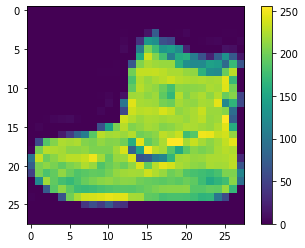

In [20]:
# Get the first image in training set
plt.figure()
plt.imshow(train_images[0])

# Displays the image color bar
plt.colorbar()
plt.grid(False)
plt.show()

# From the color bar we will see that the pixel values fall in the range 0 to 255

In [21]:
# Scale the pixel values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

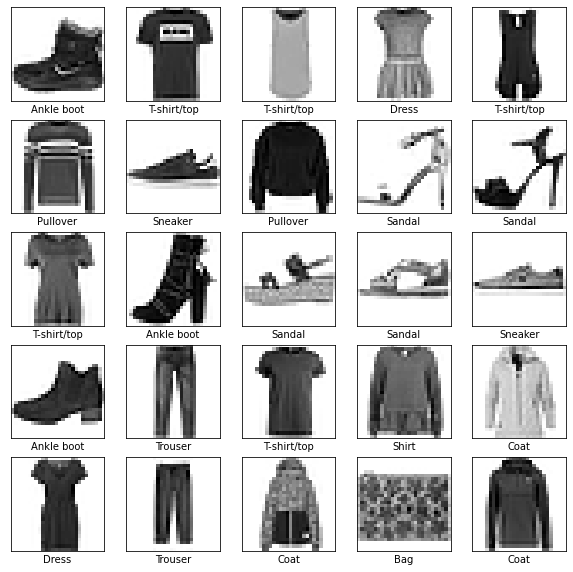

In [30]:
# Display the first 25 images from the training set and display the class name below each image

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

**BUILD THE MODEL**

Building the neural network requires configuring the layers of the model, then compiling the model.

In handling this case, 3 layers are used.
1. Reformats the data. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
2. After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [32]:
# SET UP THE LAYERS

model = tf.keras.Sequential([
    # Make the first layer
    tf.keras.layers.Flatten(input_shape=(28,28)),

    # Make the second layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Make the third layer
    tf.keras.layers.Dense(10)
])

In [34]:
# COMPILE THE MODEL

# optimizer : This is how the model is updated based on the data it sees and its loss function.
# loss : This measures how accurate the model is during training.
# metrics : Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**TRAIN THE MODEL**

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. Ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [35]:
# FEED THE MODEL
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4988 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3146 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2593 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2505 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

This model reaches an accuracy of about 0.91 (or 91%) on the training data.

In [36]:
# EVALUATE ACCURACY
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3365 - accuracy: 0.8841

Test accuracy: 0.8841000199317932


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 

In [38]:
# MAKE PREDICTIONS

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [39]:
# Get array that represent the model's 'confidence' that the image corresponds to each of the 10 different articles of clothing.
predictions[0]

array([7.0990523e-06, 1.6535402e-08, 6.2119064e-08, 3.4388815e-11,
       1.6955066e-07, 1.1519290e-03, 1.3617914e-06, 2.5381552e-02,
       3.6397651e-06, 9.7345418e-01], dtype=float32)

In [40]:
# See which label has the highest confidence value
np.argmax(predictions[0])

9

In [41]:
# Examining the test label shows that this clasification is correct
test_labels[0]

9

In [43]:
# GRAPH TO VERIFY PRECTIONS

def plot_image(i, predictions_array, true_label, img):
  # A function that plots the image and shows whether the prediction is correct or not
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # The graph will be blue if the prediction is correct and red if it isn't.
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # Create label on the x-axis
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  # Function that plots the array values
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

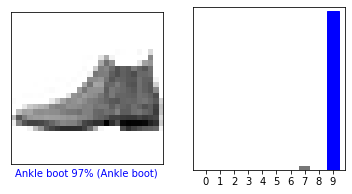

In [44]:
# VERIFY PREDICTIONS

# Look at the 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Graph shows that the model trained is correct (91%)

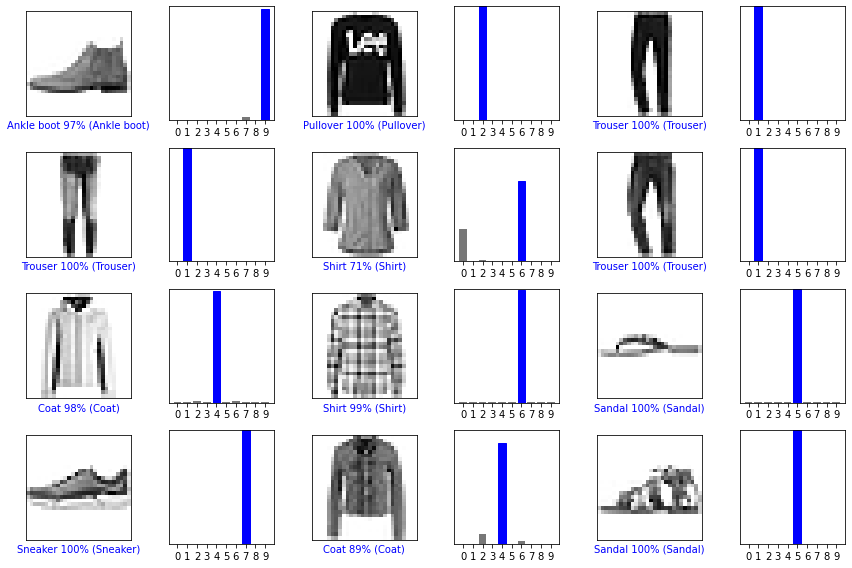

In [46]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**USED THE TRAINED MODEL**

In [55]:
# Grab an image from the test dataset and add the image to a batch where it's the only member.
# Note : tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [56]:
# Predict the correct label for this image

predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.3552754e-05 7.3043148e-11 9.9945718e-01 2.2109430e-12 4.4586431e-04
  4.7123533e-10 8.3381310e-05 7.4824128e-18 6.7136813e-10 7.4617470e-14]]


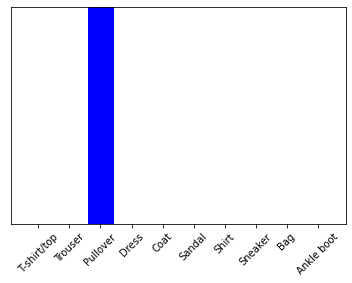

In [57]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
Model predict the correct value. This image is pullover.

In [58]:
np.argmax(predictions_single[0])

2